<a href="https://colab.research.google.com/gist/qbeer/1df46c5028ad976dcf497f8117046830/hw9_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks, introduction


### 1. Implement a logistic regression model on MNIST for binary classification in Numpy

* use `from sklearn.datasets import load_digits`
  * the provided data files: X_train, X_test are a split generated by the author of this exercise
  * w, b are the fitted logistic regression weight and bias, the predictions on the provided test set can be generated by: `y_pred_test = sigmoid(np.dot(w, X_test.T) + b)`
  * the binarized accuracy score should be above 98% for this particular data
* divide the data into 0 vs. 1-9. categories
  * the goal is to separate the zeros
* y = logistic(wx + b)
* optimize the model via stochastic mini-batch gradient descent until you reach above 90% accuracy on the test set

* the loss:

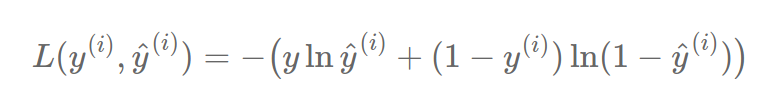

* the gradients of the mini-batch loss:

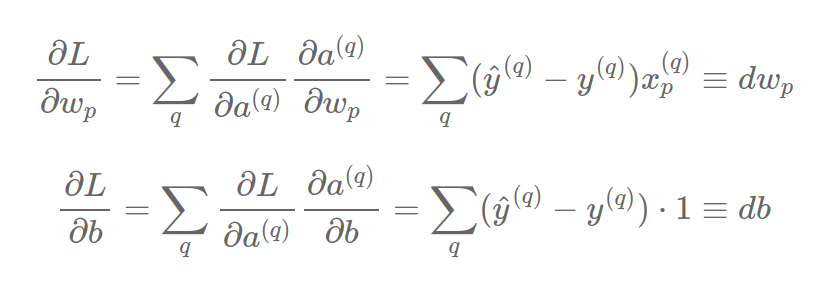



For some reason, this task does not add up in my head, so I had to look at different solutions! Of course, this exact solution is not in them!

1. Is there anything specific about the classification? 

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py


2. Logistic regression:

https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/


3. Loss function and the mini batch gradient:

https://stats.stackexchange.com/questions/266968/how-does-minibatch-gradient-descent-update-the-weights-for-each-example-in-a-bat

In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
import os 
import pathlib
import glob

from sklearn.datasets import load_digits
from sklearn import metrics

Let's implement a mini-batch gradient descent!

NOTE:

b: bias is a silly name for the intercept_ that is used in sklearn...

In [242]:
def sigmoid(value):
    """
    Returns the values inputted into a sigmoid function
    
    INPUT:
        value: value, FLOAT or ARRAY
    OUTPUT:
        returned value after applying the sigmoid function
    
    """
    return 1.0/(1.0+np.exp(-value))

def predict(X,w0):
    """
    Predicting values
    
    INPUT:
        X: input values for the prediction
        b0: bias
        w0: weights
    OUTPUT:
        y_pred: prediction for logistic regression
    """
    return sigmoid(np.dot(w0, X.T))

def predict2(X,w0,b0):
    """
    Predicting values
    
    INPUT:
        X: input values for the prediction
        b0: bias
        w0: weights
    OUTPUT:
        y_pred: prediction for logistic regression
    """
    return sigmoid(np.dot(w0, X.T)+b0)

def minibatch_gradient_descent(X,y,b,w,learning_rate=0.01,iterations=10, batch_size=20):
    """
    Mini-batch descent with shuffle and (almost) logistic regression burned in.
    
    INPUT:
        X: input values for fitting, ARRAY
        y: target values for logistic regression, ARRAY
        b: bias for logistic regression, FLOAT
        w: weigths for every feature in the dataset
        learning_rate: user given learning rate for the mini_batch
        iterations: number of iterations, INT
        batch_size: size of batch, INT
    OUTPUT
        w: finalized coefs, bias included
        cost_history: cost history for the fit
    
    """
    #asserting stuff, HAHA!
    assert len(X) == len(y), "Mismatching input lenghts! [{0} {1}]".format(len(X), len(y))
    assert batch_size > 1, "Please, make the batch size bigger (>1)"
    assert len(w) == len(X[0]), "Mismatching weigth number and feature number!"
    assert iterations > 1, "Please, let me work longer!"
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost=0.0
        
        #shuffle
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        
        #NOTE: i have to calculate the loss for every row
        #      and than sum it up to calculate the new coeffs
        
        for i in range(0,m,batch_size):
            #init values and containers for the mini-batch
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            prediction = np.vstack(predict2(X_i,w,b))
            #update
            b = b - (1/batch_size) * learning_rate*(np.ones(len(X_i)).dot(prediction - y_i).flatten())
            w = w - (1/batch_size) * learning_rate*(X_i.T.dot((prediction - y_i))).flatten()
                                                                                   #additional row for all the other coeffs
            #cost += cal_cost(theta,X_i,y_i)                                       #this is not here at all
        #cost_history[it] = cost
    return b, w, cost_history

#NOTE: technically the one before works well, but we need the averages for each iterations
#      also, this is just a bit faster
def minibatch_gradient_descent2(X,y,b,w,learning_rate=0.01,iterations=10, batch_size=20):
    """
    Mini-batch descent with shuffle and (almost) logistic regression burned in.
    
    INPUT:
        X: input values for fitting, ARRAY
        y: target values for logistic regression, ARRAY
        b: bias for logistic regression, FLOAT
        w: weigths for every feature in the dataset
        learning_rate: user given learning rate for the mini_batch
        iterations: number of iterations, INT
        batch_size: size of batch, INT
    OUTPUT
        w: finalized coefs, bias included
        cost_history: cost history for the fit
    
    """
    #asserting stuff, HAHA!
    assert len(X) == len(y), "Mismatching input lenghts! [{0} {1}]".format(len(X), len(y))
    assert batch_size > 1, "Please, make the batch size bigger (>1)"
    assert len(w) == len(X[0]), "Mismatching weigth number and feature number!"
    assert iterations > 1, "Please, let me work longer!"
    
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost=0.0
        
        #containers for each iterations
        b_list = np.zeros(n_batches)
        w_list = np.zeros((n_batches,len(X[0])))
        
        #shuffle
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        
        #NOTE: i have to calculate the loss for every row
        #      and than sum it up to calculate the new coeffs
        
        for i in range(0,n_batches):
            #init values and containers for the mini-batch
            X_i = X[i*batch_size:(i+1)*batch_size]
            y_i = y[i*batch_size:(i+1)*batch_size]

            prediction = np.vstack(predict2(X_i,w,b))
            #update
            b_list[i] = np.ones(len(X_i)).dot(prediction - y_i).flatten()
            w_list[i] = (X_i.T.dot((prediction - y_i))).flatten()
                                                                                   #additional row for all the other coeffs
            #cost += cal_cost(theta,X_i,y_i)                                       #this is not here at all
        
        #averagin results
        b_av = np.average(b_list,axis=0)
        w_av = np.average(w_list,axis=0)
        
        #gradient
        b = b - learning_rate * b_av
        w = w - learning_rate * w_av
        
        #cost_history[it] = cost
    return b, w, cost_history

def confusion_m_plot(y1,y2,title):
    C_MY = metrics.confusion_matrix(y1, y2)
    display(C_MY)

    fig,ax = plt.subplots(1,1,figsize=(7,7))

    ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
    ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
    ax_x = ["ZERO", "NOT ZERO"]                           #class tick labels
    ax_y = ["ZERO", "NOT ZERO"]                           #survived tick labels
    ax.set_xticklabels(ax_x, fontsize=18)
    ax.set_yticklabels(ax_y, fontsize=18)


    ax.set_title(title, fontsize=20)
    im1 = ax.imshow(C_MY, cmap="gray")

    for i in range(0,len(C_MY)):
        for j in range(0,2):
            color0="black"
            if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
                color0 = "white"
            text = ax.text(j, i, str(C_MY[i, j]),
                           ha="center", va="center", color=color0, fontsize=21)    

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')        

    fig.tight_layout()

    plt.show()
    
def confusion_m_plot2(y1,y2,title):
    C_MY = metrics.confusion_matrix(y1, y2)
    display(C_MY)

    fig,ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xticks(np.arange(0,len(C_MY[0,:])))            #class ticks place
    ax.set_yticks(np.arange(0,len(C_MY[:,0])))            #survived ticks place
    ax_x = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]                           #class tick labels
    ax_y = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]                           #survived tick labels
    ax.set_xticklabels(ax_x, fontsize=18)
    ax.set_yticklabels(ax_y, fontsize=18)


    ax.set_title(title, fontsize=20)
    im1 = ax.imshow(C_MY, cmap="gray")

    for i in range(0,len(C_MY)):
        for j in range(0,len(C_MY[0])):
            color0="black"
            if(int(round(C_MY[i,j])) < int(round(np.max(C_MY)))*0.7):
                color0 = "white"
            text = ax.text(j, i, str(C_MY[i, j]),
                           ha="center", va="center", color=color0, fontsize=21)    

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')        

    fig.tight_layout()

    plt.show()

So... what is happening in this implementation?

Well, what i do here is simple: its a logistic regression with mini-batch gradient. But, the mini-batch gradient has multiple ways to use so I had to decide with one. These are the version avaliable:

1. Every mini-batch provides a change in the bias and weight parameters, and they do it after each other.
2. Every mini-batch provides a change in the splitting and their bias and weight parameters are avaraged together to create the change the original b, w values that is used for the next splitting.

Seems like both of the is a correct way to use as the mini-batch's point is to fit a part of the data.

And i burnt in a shuffle :)

Forgot that they already provided a dataset for this... That they split before hand... and

In [159]:
X_train = np.load("./data/X_train.npy")
y_train = np.load("./data/y_train.npy")
X_test = np.load("./data/X_test.npy")
y_test = np.load("./data/y_test.npy")

b_init = np.load("./data/b.npy")
w_init = np.load("./data/w.npy")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(b_init.shape)
print(w_init.shape)

(1618, 64)
(1618, 1)
(179, 64)
(179, 1)
()
(1, 64)


In [160]:
X_train[0]

array([ 0.        , -0.3394476 , -0.04044349,  0.28459854, -0.67387118,
       -0.8461742 , -0.41473844, -0.12495473, -0.04722214, -0.62852742,
        0.48931403,  0.75221779, -0.04861155,  1.14818784,  0.87028995,
       -0.13127165, -0.03337249,  0.11573289,  0.8926328 , -0.87433486,
       -1.14728765,  0.53201184,  1.88789566, -0.11808942, -0.03517987,
        0.48053982,  0.46290925, -1.53725584, -1.62920159,  0.07451696,
        1.51270598, -0.04978267,  0.        ,  0.75417842,  0.04791859,
       -1.461766  , -1.74927733,  0.03331645,  1.46527707,  0.        ,
       -0.06466137,  0.80714535,  0.63337525, -1.12779606, -1.06176828,
        0.65078693,  0.82259266, -0.08729752, -0.03734445,  0.73139557,
        1.15477837, -0.85284642,  0.10193343,  0.53745913, -0.75683605,
       -0.20646752, -0.02486823, -0.30188347,  0.08337664,  0.21711379,
       -0.37199005, -1.14591916, -0.50428416, -0.18504012])

This is the prediction that should be used as the reference. My implementation needs to reach this level of accuracy if not more. The exercise states that I should reach a 90% accuracy.

In [161]:
y_pred_test = np.around(sigmoid(np.dot(w_init, X_test.T) + b_init))

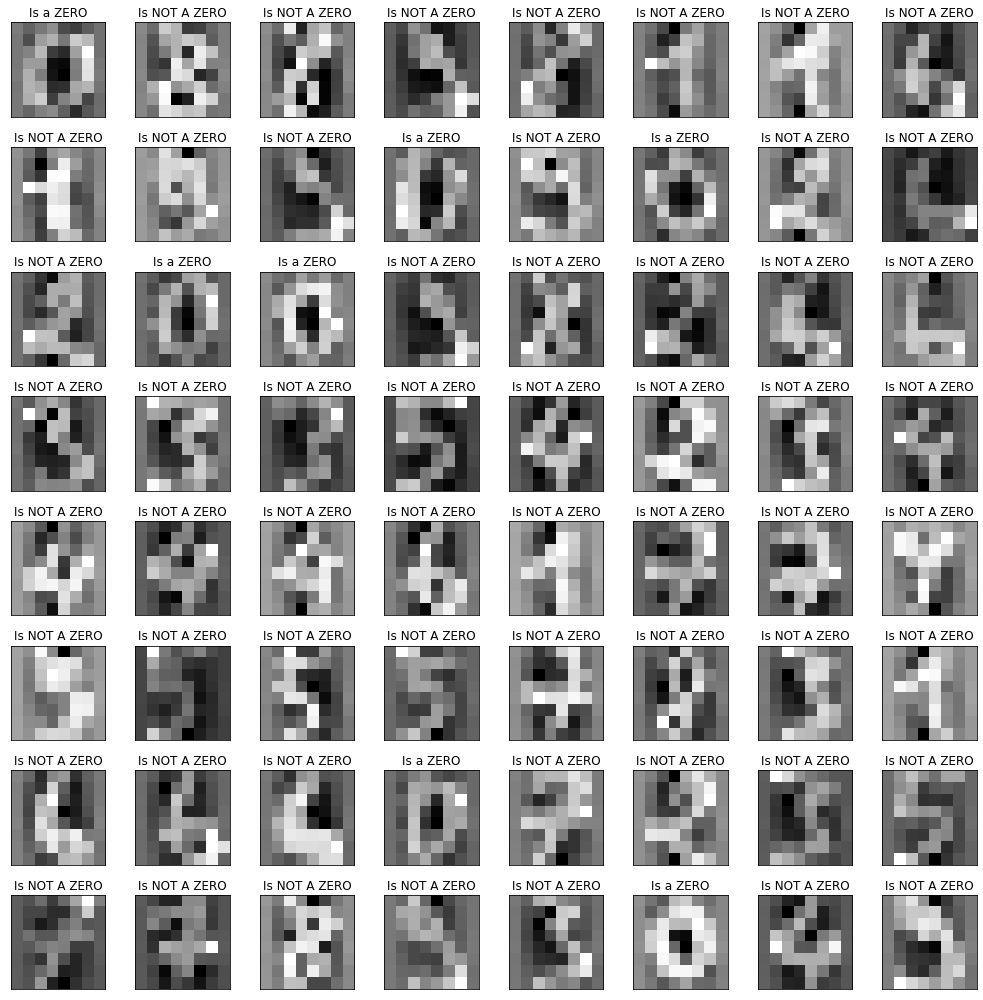

In [162]:
nrows=8
ncols=8

title_nameset = ["Is a ZERO", "Is NOT A ZERO"]

fig, ax = plt.subplots(nrows,ncols,figsize=(14,14))

for i in range(ncols):
    for j in range(nrows):
        image = X_train[i+j*ncols].reshape(8,8)
        ax[i,j].imshow(image, cmap="gray", interpolation="nearest")
        ax[i,j].set_title(title_nameset[int(y_train[i+j*ncols])])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

fig.tight_layout()        
plt.show()

Just a couple of NOTEs!

[1] The data is the same as the images, but it is flattened 

[2] I will use the data for prediction

So, we have many many many nonzero targets, about 1/10... Let's see if this very simple implementation works


In [177]:
bias = 1
w_i = np.array([np.random.random() for i in range(64)]) * 0.1
bias_end, w_end, c_ = minibatch_gradient_descent(X_train,
                                                 y_train,
                                                 b=bias,
                                                 w=w_i,
                                                 learning_rate=0.01,
                                                 iterations=1000,
                                                 batch_size=32)


y_pred0 = np.around(predict2(X_train, w_end, bias_end))
y_pred = np.around(predict2(X_test, w_end, bias_end))

In [178]:
bias_end2, w_end2, c_2 = minibatch_gradient_descent2(X_train,
                                                 y_train,
                                                 b=bias,
                                                 w=w_i,
                                                 learning_rate=0.01,
                                                 iterations=1000,
                                                 batch_size=32)

y_pred02 = np.around(predict2(X_train, w_end, bias_end2))
y_pred2 = np.around(predict2(X_test, w_end, bias_end2))

In [179]:
bias_end, w_end

(array([6.36464724]),
 array([ 3.44579386e-02,  6.07318389e-02, -6.42359069e-02, -3.25716620e-01,
         9.99890754e-02,  6.58606680e-01,  2.15727454e-01, -1.66404821e-02,
         6.20154924e-03,  3.39805655e-01,  8.39283393e-02, -2.31447655e-01,
        -6.45291748e-01, -7.73124732e-01,  3.92947189e-02,  1.20532139e-01,
         4.28222907e-02, -1.97014951e-01, -5.70007196e-02,  1.16472244e-01,
         5.61404494e-01, -7.29302451e-01,  5.13613027e-04,  1.98570980e-02,
         1.65294872e-02, -2.45338395e-01, -2.31533991e-02,  4.77747167e-01,
         1.16480600e+00,  2.00871934e-01, -1.90845646e-01, -5.19163973e-02,
         8.06475609e-02, -3.46609065e-01, -3.92586987e-01,  5.86581579e-01,
         8.12398100e-01,  3.15838160e-01, -9.29130536e-02,  8.22536673e-02,
         2.05902943e-02,  1.99097693e-01, -8.57019931e-01,  9.06663507e-01,
         8.00443844e-01, -4.51603746e-02, -1.74260926e-01, -9.81232547e-02,
         4.45125423e-02,  2.83088097e-01, -3.47549728e-01, -1.5459

In [180]:
bias_end2, w_end2

(5.7196117829159165,
 array([ 0.03445794,  0.05441046, -0.04708777, -0.30276719,  0.11808732,
         0.57130761,  0.16888898, -0.01263029,  0.00860385,  0.30264803,
         0.05238266, -0.19747634, -0.58487704, -0.68615801,  0.0473264 ,
         0.09667687,  0.03859095, -0.16154766, -0.03031138,  0.0917226 ,
         0.46186286, -0.6435306 , -0.02275018,  0.02449681,  0.01870344,
        -0.25248249, -0.01863092,  0.45341136,  1.02086087,  0.19809229,
        -0.1903306 , -0.04350037,  0.08064756, -0.30172086, -0.36482782,
         0.54604878,  0.7114057 ,  0.33778867, -0.14029966,  0.08225367,
         0.02439283,  0.17994513, -0.76048273,  0.79490561,  0.72559591,
        -0.04524479, -0.12400549, -0.06904717,  0.0431658 ,  0.26924296,
        -0.33914924, -0.15886712, -0.35513831, -0.08543625,  0.42213264,
         0.18731626, -0.04736088,  0.11935613,  0.22765897, -0.17877295,
         0.35434835,  0.20808105,  0.08520378,  0.04332903]))

In [181]:
w_init.flatten() - w_end

array([-4.23037904e-01,  1.23118607e-01,  1.45600641e-03, -2.26950583e-01,
       -5.00816747e-01,  1.02703152e-01, -7.25547776e-01, -9.39314483e-02,
       -2.49913005e-02, -4.05628745e-01, -4.97798183e-01,  6.85310420e-01,
        2.79859592e-01,  8.12878585e-01,  1.49906587e-01, -9.21441986e-02,
        1.78648173e-01,  9.61037484e-02,  4.84163061e-01, -7.66049028e-01,
       -2.96174649e-01, -2.92404830e-01, -2.24364144e-01,  6.96146664e-02,
       -1.94261283e-01, -2.42896539e-02, -6.38757957e-02, -4.89989943e-02,
        1.74522146e-01, -5.61807467e-01,  1.52951363e-01,  2.14964958e+00,
       -1.25937933e+00, -4.07128424e-01,  4.48192049e-01, -8.85993326e-01,
       -1.44077326e-01,  9.54662320e-01,  4.02175732e-02, -1.35481281e+00,
        5.79813213e-02,  1.10981821e-02, -1.44335410e-01,  1.44120284e-01,
        1.94777008e-01, -7.47473234e-01, -4.38844889e-01, -1.83084609e-01,
       -1.05382258e+00, -1.16245403e-02,  2.42601039e-01, -1.73915473e-01,
       -1.78205797e-01,  

In [182]:
w_init.flatten() - w_end2

array([-0.4230379 ,  0.12943999, -0.01569213, -0.24990002, -0.518915  ,
        0.19000223, -0.6787093 , -0.09794164, -0.02739361, -0.36847112,
       -0.46625251,  0.6513391 ,  0.21944489,  0.72591187,  0.14187491,
       -0.06828893,  0.18287952,  0.06063645,  0.45747372, -0.74129938,
       -0.19663302, -0.37817668, -0.20110035,  0.06497496, -0.19643524,
       -0.01714556, -0.06839828, -0.02466319,  0.31846727, -0.55902783,
        0.15243632,  2.14123356, -1.25937933, -0.45201663,  0.42043288,
       -0.84546053, -0.04308493,  0.93271181,  0.08760418, -1.35481281,
        0.05417879,  0.03025075, -0.24087261,  0.25587818,  0.26962494,
       -0.74738882, -0.48910033, -0.2121607 , -1.05247584,  0.00222059,
        0.23420055, -0.16964623, -0.2140093 ,  0.31812383,  0.4122786 ,
        0.61049647,  0.26072381, -0.09541161,  0.23097443, -0.1433817 ,
        0.25517188, -0.50401854, -0.21196247, -0.66915512])

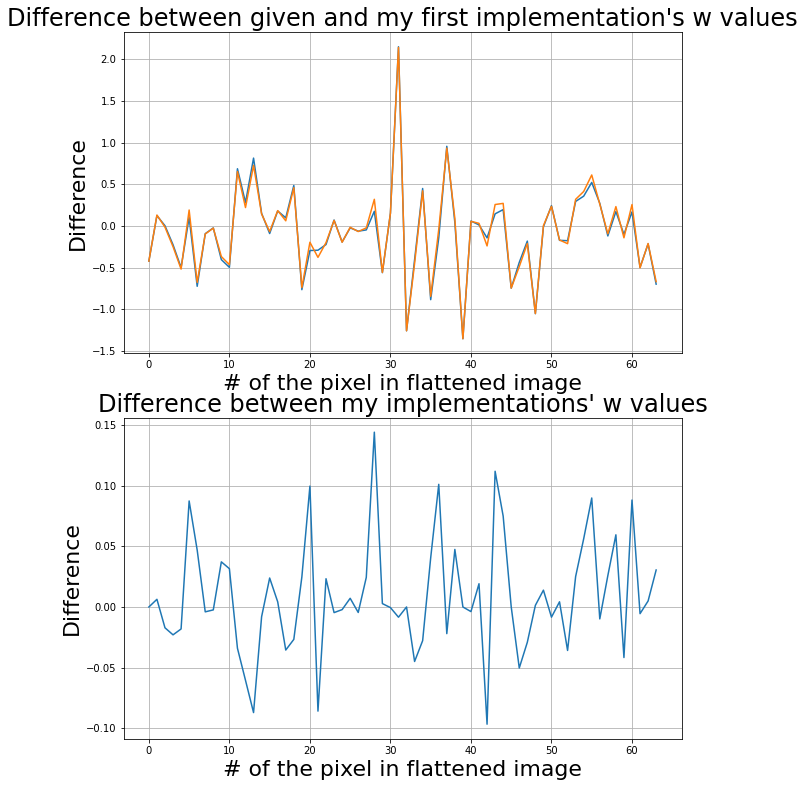

In [183]:
fig,ax = plt.subplots(2,1,figsize=(10,13))
ax[0].set_title("Difference between given and my first implementation's w values", fontsize=24)
ax[0].plot(np.arange(64), w_init.flatten() - w_end)
ax[0].plot(np.arange(64), w_init.flatten() - w_end2)
ax[0].set_xlabel("# of the pixel in flattened image", fontsize=22)
ax[0].set_ylabel("Difference", fontsize=22)



ax[1].set_title("Difference between my implementations' w values", fontsize=24)
ax[1].plot(np.arange(64), w_end - w_end2)
ax[1].set_xlabel("# of the pixel in flattened image", fontsize=22)
ax[1].set_ylabel("Difference", fontsize=22)


fig.tight_layout
ax[0].grid()
ax[1].grid()
plt.show()

array([[ 150,    0],
       [   1, 1467]], dtype=int64)

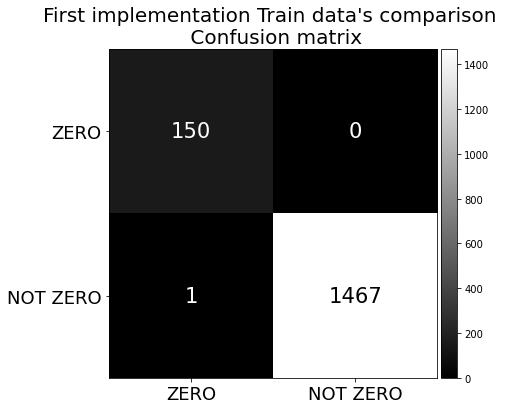

array([[ 27,   0],
       [  0, 152]], dtype=int64)

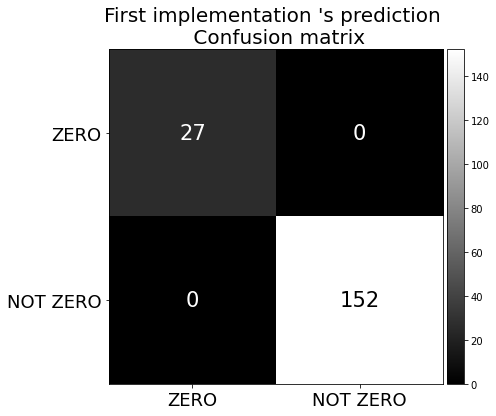

array([[ 150,    0],
       [   1, 1467]], dtype=int64)

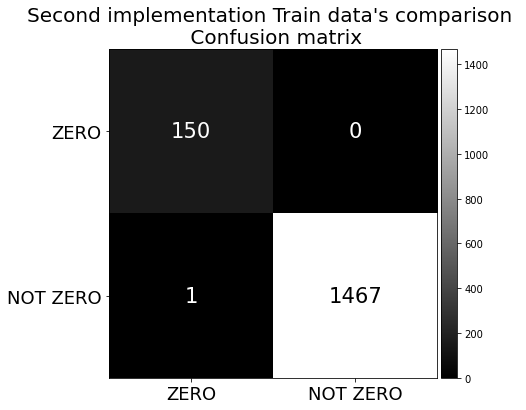

array([[ 27,   0],
       [  0, 152]], dtype=int64)

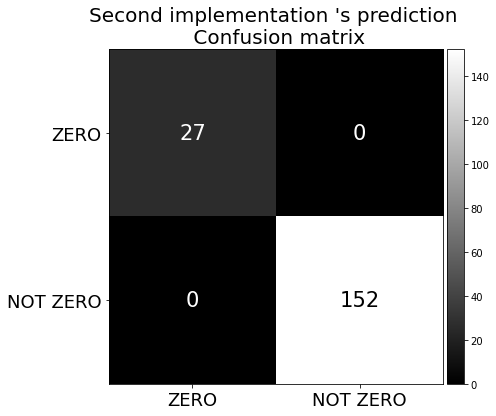

array([[ 26,   2],
       [  1, 150]], dtype=int64)

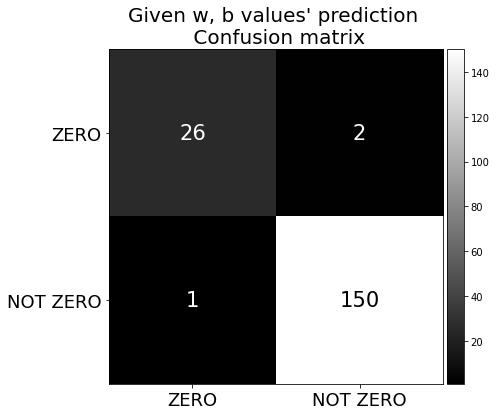

In [184]:
confusion_m_plot(y_pred0, y_train.flatten(),"First implementation Train data's comparison \n Confusion matrix")
confusion_m_plot(y_pred, y_test.flatten(), "First implementation 's prediction \n Confusion matrix")
confusion_m_plot(y_pred0, y_train.flatten(),"Second implementation Train data's comparison \n Confusion matrix")
confusion_m_plot(y_pred, y_test.flatten(), "Second implementation 's prediction \n Confusion matrix")
confusion_m_plot(y_pred_test.flatten(), y_test.flatten(), "Given w, b values' prediction \n Confusion matrix")

In [185]:
randoms = np.array([np.random.random() for i in range(64)])

randoms 

array([6.00364783e-02, 3.66754762e-01, 7.19966579e-01, 8.92646228e-01,
       1.94667185e-01, 2.75300519e-01, 6.40881387e-01, 9.41738613e-01,
       5.19746521e-02, 1.49144692e-01, 9.26325930e-01, 7.73343570e-01,
       9.29366282e-01, 7.71497527e-01, 3.67844468e-01, 6.20404458e-01,
       1.07875387e-01, 6.24650769e-01, 7.67487110e-02, 6.63366190e-02,
       3.60322343e-01, 4.82700691e-01, 2.19471538e-01, 4.62430668e-01,
       5.65612858e-01, 4.33275072e-01, 5.55421378e-01, 3.59637408e-01,
       1.76317061e-01, 1.98486340e-01, 1.73548460e-01, 3.66074345e-01,
       5.43274096e-01, 9.85228114e-01, 2.79204630e-01, 7.36800661e-01,
       4.59210726e-01, 1.93645294e-01, 5.35939460e-01, 6.55822951e-01,
       1.95772878e-01, 2.64042550e-01, 7.44529517e-01, 4.62834578e-01,
       2.86546007e-01, 4.81694729e-01, 9.43319601e-01, 1.91588310e-01,
       6.56881315e-01, 8.08313734e-01, 7.12508532e-01, 3.31313112e-01,
       9.77338948e-01, 7.65712656e-01, 4.53727197e-01, 3.88959502e-01,
      

I was able to pinpoint the parameters fastly that are making my classification method better than the author's implementation. This doesn't mean that the author's implementation is bad, it means that I have better hyperparameters that causes higher accuracy.

${\bf NOTE 1}$

Its more accurate because I have 1000 iterations. 

### 2. MLP model in `tf.keras`

* implement a model as such:

 * 750 neuron, relu activation
 * 500 neuron, relu activation
 * 500 neuron, relu activation
 * 10 neuron, softmax activation

* use the `tf.keras.datasets.mnist` dataset in this case
* preprocess if necessary
* use the 'sgd' optimizer, log the loss ('categorical_crossentropy') and the accuracy, as well as the AUC score during training, visualize the history of these values



${\bf MESSEGE}$:

Just saying, you provided a very good and followable example code for this exercise!

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (E:\ANACONDA\conda\lib\site-packages\tensorflow\python\keras\layers\normalization\__init__.py)

So, it turns out that I did set up an environment fo the GPU to be seen...

In [364]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [365]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

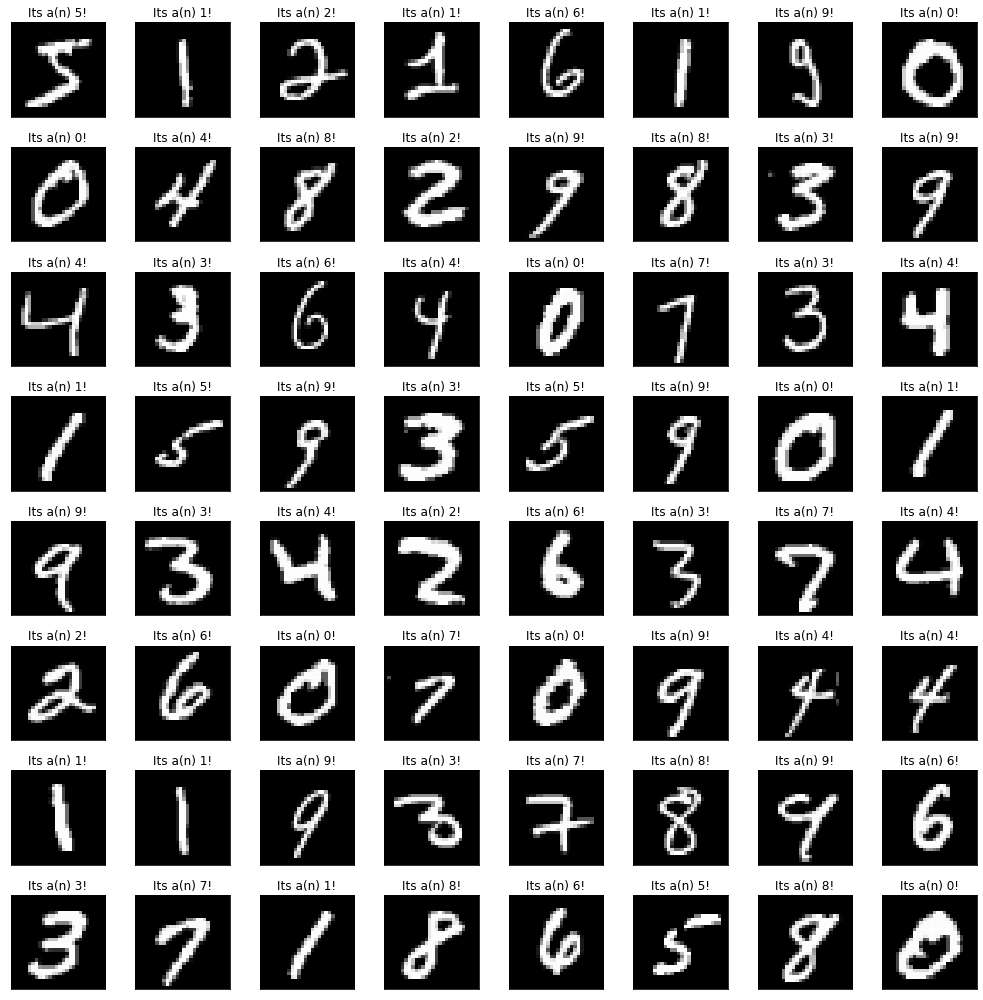

In [366]:
nrows=8
ncols=8

fig, ax = plt.subplots(nrows,ncols,figsize=(14,14))

for i in range(ncols):
    for j in range(nrows):
        image = x_train[i+j*ncols]
        ax[i,j].imshow(image, cmap="gray", interpolation="nearest")
        ax[i,j].set_title("Its a(n) {0}!".format(int(y_train[i+j*ncols])))
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

fig.tight_layout()        
plt.show()

In [367]:
x_train.min(), x_train.max()

(0, 255)

In [368]:
x_train = x_train.reshape(60000, 28*28)/255
x_test = x_test.reshape(10000, 28*28)/255

x_train.shape, x_test.shape, x_train.min(), x_train.max()

((60000, 784), (10000, 784), 0.0, 1.0)

In [369]:
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

If they wanted something better, the dtype=uint8 uses less memory. Maybe something that is binary?

In [370]:
model = keras.Sequential()
model.add(keras.layers.Dense(750, activation='relu', input_dim=784))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [371]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 750)               588750    
                                                                 
 dense_17 (Dense)            (None, 500)               375500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 10)                5010      
                                                                 
Total params: 1,219,760
Trainable params: 1,219,760
Non-trainable params: 0
_________________________________________________________________


In [372]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=['accuracy', 'AUC'])

In [373]:
history = model.fit(x=x_train, y=y_train_oh, batch_size=64, epochs=15, validation_data=(x_test, y_test_oh))

Epoch 1/15
938/938 [==============================] - 5s 5ms/step - loss: 0.7661 - accuracy: 0.8176 - auc: 0.9742 - val_loss: 0.3364 - val_accuracy: 0.9075 - val_auc: 0.9920
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 0.3041 - accuracy: 0.9133 - auc: 0.9929 - val_loss: 0.2618 - val_accuracy: 0.9251 - val_auc: 0.9941
Epoch 3/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2480 - accuracy: 0.9294 - auc: 0.9948 - val_loss: 0.2196 - val_accuracy: 0.9382 - val_auc: 0.9954
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2135 - accuracy: 0.9394 - auc: 0.9958 - val_loss: 0.1954 - val_accuracy: 0.9427 - val_auc: 0.9961
Epoch 5/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1872 - accuracy: 0.9464 - auc: 0.9965 - val_loss: 0.1756 - val_accuracy: 0.9496 - val_auc: 0.9969
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1661 - accuracy: 0.9525 - auc: 0.9972 - val_loss: 0.16

In [374]:
history.history['val_auc']

[0.9920270442962646,
 0.9940966367721558,
 0.9953802227973938,
 0.9960715770721436,
 0.9969001412391663,
 0.9969812631607056,
 0.9975634813308716,
 0.9974125027656555,
 0.9979665279388428,
 0.9981671571731567,
 0.9980146288871765,
 0.998503565788269,
 0.9983789920806885,
 0.9988736510276794,
 0.9988299012184143]

`NOTE`: this way CPU rolling at 4.2 GHz for 80\% usage

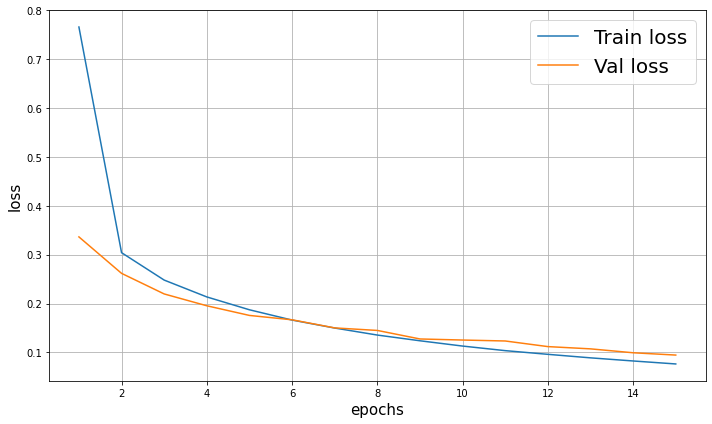

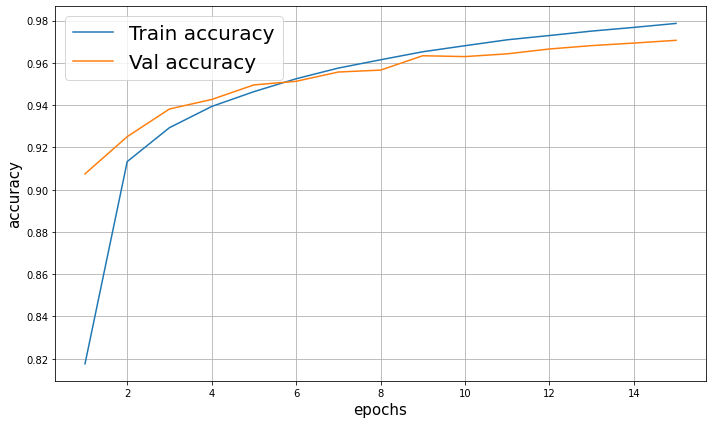

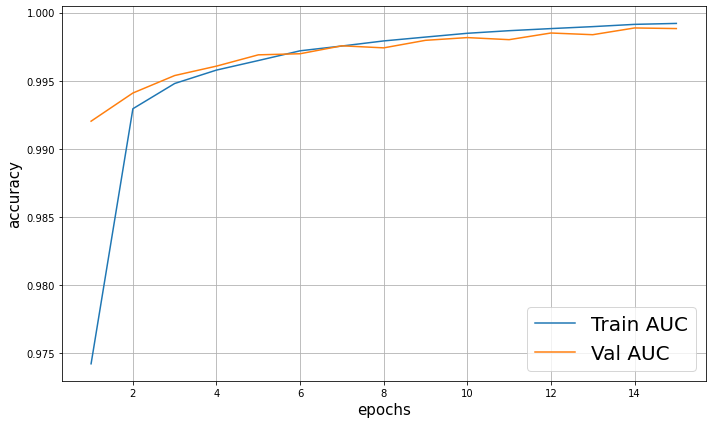

In [375]:
fig = plt.figure(figsize=(10,6))

plt.plot(np.arange(15)+1,history.history['loss'], label='Train loss')
plt.plot(np.arange(15)+1,history.history['val_loss'], label='Val loss')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('loss', fontsize=15)

fig.tight_layout()
plt.grid()
plt.legend(loc="best",fontsize=20)
plt.show()

fig = plt.figure(figsize=(10,6))

plt.plot(np.arange(15)+1,history.history['accuracy'], label='Train accuracy')
plt.plot(np.arange(15)+1,history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

fig.tight_layout()
plt.grid()
plt.legend(loc="best", fontsize=20)
plt.show()

fig = plt.figure(figsize=(10,6))

plt.plot(np.arange(15)+1,history.history['auc'], label='Train AUC')
plt.plot(np.arange(15)+1,history.history['val_auc'], label='Val AUC')
plt.xlabel('epochs', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

fig.tight_layout()
plt.grid()
plt.legend(loc="best", fontsize=20)
plt.show()

In [376]:
def show_predictions(n=5, m=5):
    fig,ax = plt.subplots(m,n,figsize=(n*2,m*2))
    for j in range(m):
        idx_start = np.random.randint(len(x_train) - n)
        preds = model.predict(x_train[idx_start:idx_start+5])
        true_labels = y_train[idx_start:idx_start+5]

        for i in range(n):
            predstr = 'pred: ' + str(preds[i].argmax()) + ', prob: ' + str(int(np.round(preds[i].max()*100,0))) + '%'
            ax[j,i].set_title(predstr + ' / \n true: ' + str(true_labels[i]),fontsize=10)
            ax[j,i].imshow(x_train[idx_start+i].reshape(28, 28)*255, cmap='gray', aspect='auto')
            if(preds[i].argmax() != true_labels[i]):
                ax[j,i].scatter([2], [2], s=500, c='r')
            ax[j,i].set_xticks([])
            ax[j,i].set_yticks([])
    fig.tight_layout()
    plt.show()

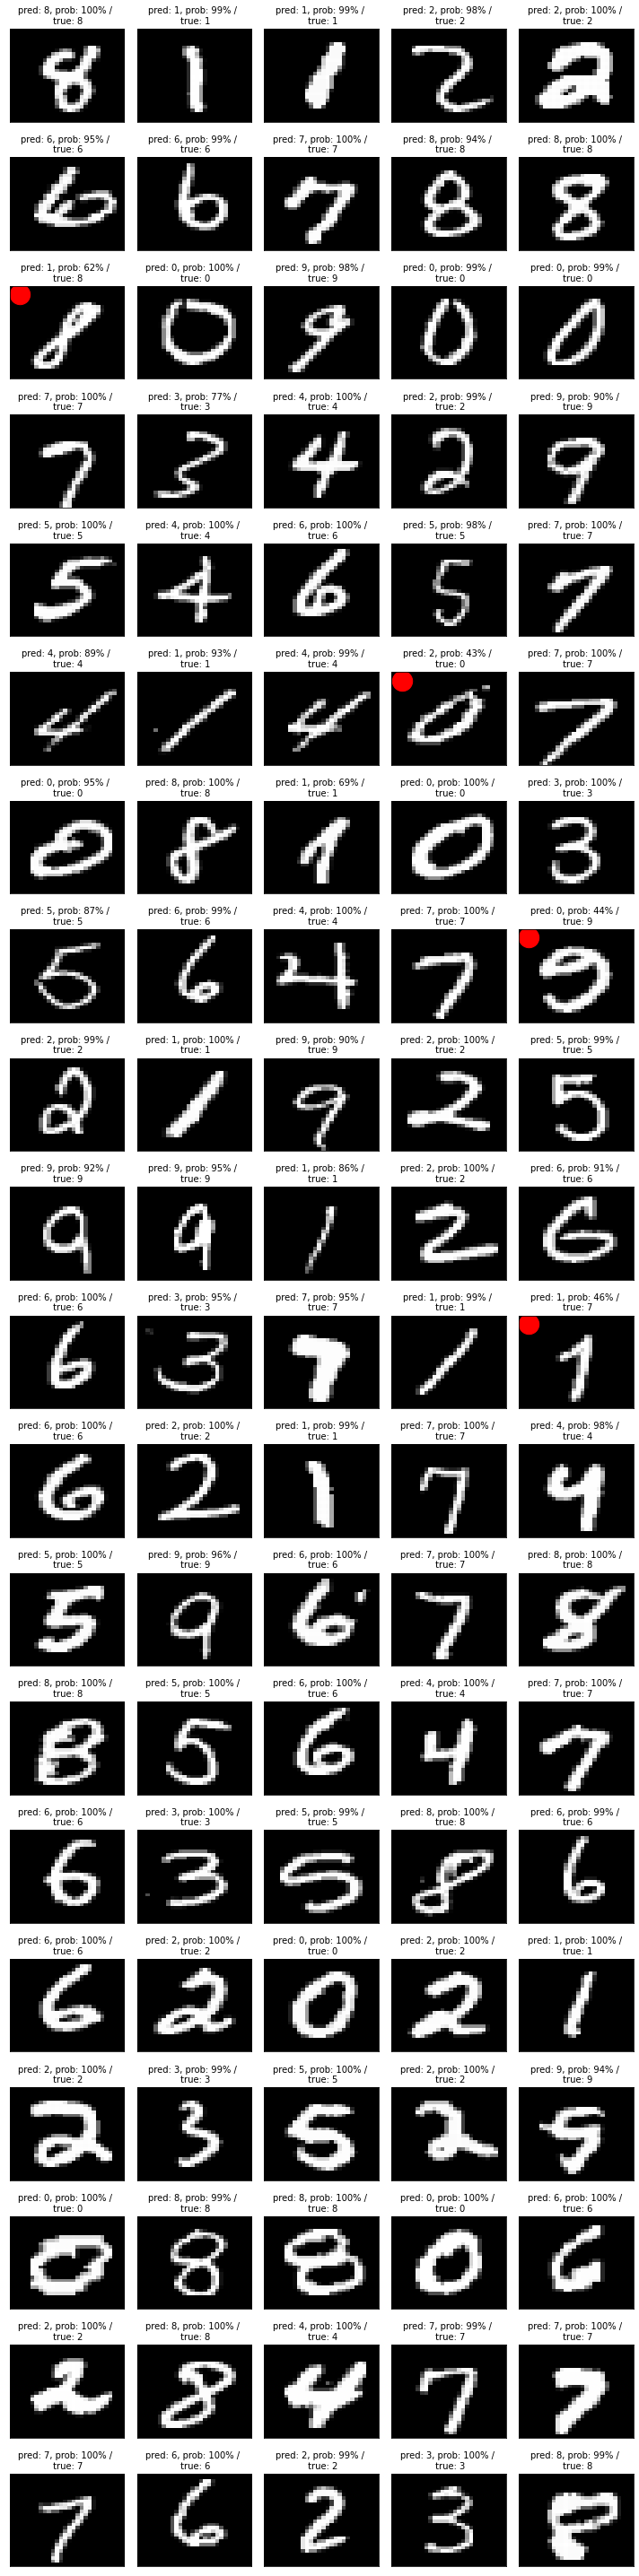

In [377]:
show_predictions(m=20)

${\bf NOTE}$

How the hell can't someone write an eight with a closed loop? Just why can't you? Also, ther are 3s that just... angering me.

### 3. Evaluation

* confusion matrix on the test set
* visualize mistakes (at least 16) in a grid, show the true and the predicted labels
* plot the ROC curve for each predicted class



### Confusion Matrix on test set

array([[ 965,    0,    1,    1,    1,    3,    4,    2,    2,    1],
       [   0, 1120,    3,    1,    0,    1,    4,    1,    5,    0],
       [   6,    2, 1004,    3,    3,    0,    2,    6,    6,    0],
       [   0,    0,    4,  990,    0,    4,    0,    5,    3,    4],
       [   1,    0,    8,    0,  953,    0,    1,    2,    2,   15],
       [   4,    1,    0,   10,    3,  858,    9,    0,    5,    2],
       [   7,    3,    1,    1,    5,    6,  931,    0,    4,    0],
       [   0,    7,   12,    5,    0,    1,    0,  990,    2,   11],
       [   6,    0,    2,    9,    3,    4,    5,    4,  937,    4],
       [   6,    5,    1,   11,   13,    3,    0,    8,    3,  959]],
      dtype=int64)

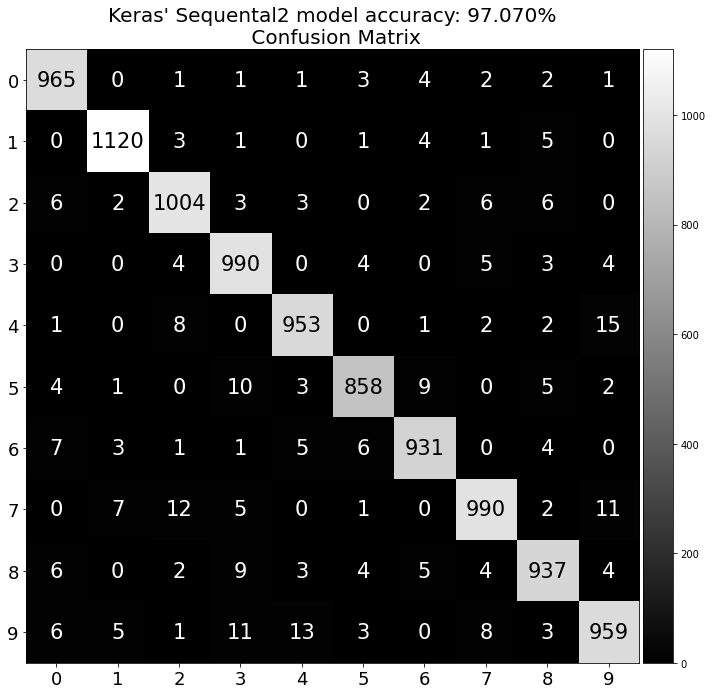

In [378]:
pred_all = model.predict(x_test)
pred_vals = np.zeros(len(pred_all))
mask = y_test == -1
for i in range(len(pred_all)):
    pred_vals[i] = pred_all[i].argmax()
    mask[i] = y_test[i] == pred_vals[i] 
_ , accs = np.unique(mask, return_counts=True)
accuracy = accs[1] / (accs[0]+ accs[1])
confusion_m_plot2(y_test,
                  pred_vals,
                  "Keras' Sequental2 model accuracy: {0:.3f}%\n Confusion Matrix".format(accuracy*100))

### Mislabeled images

64 64 64


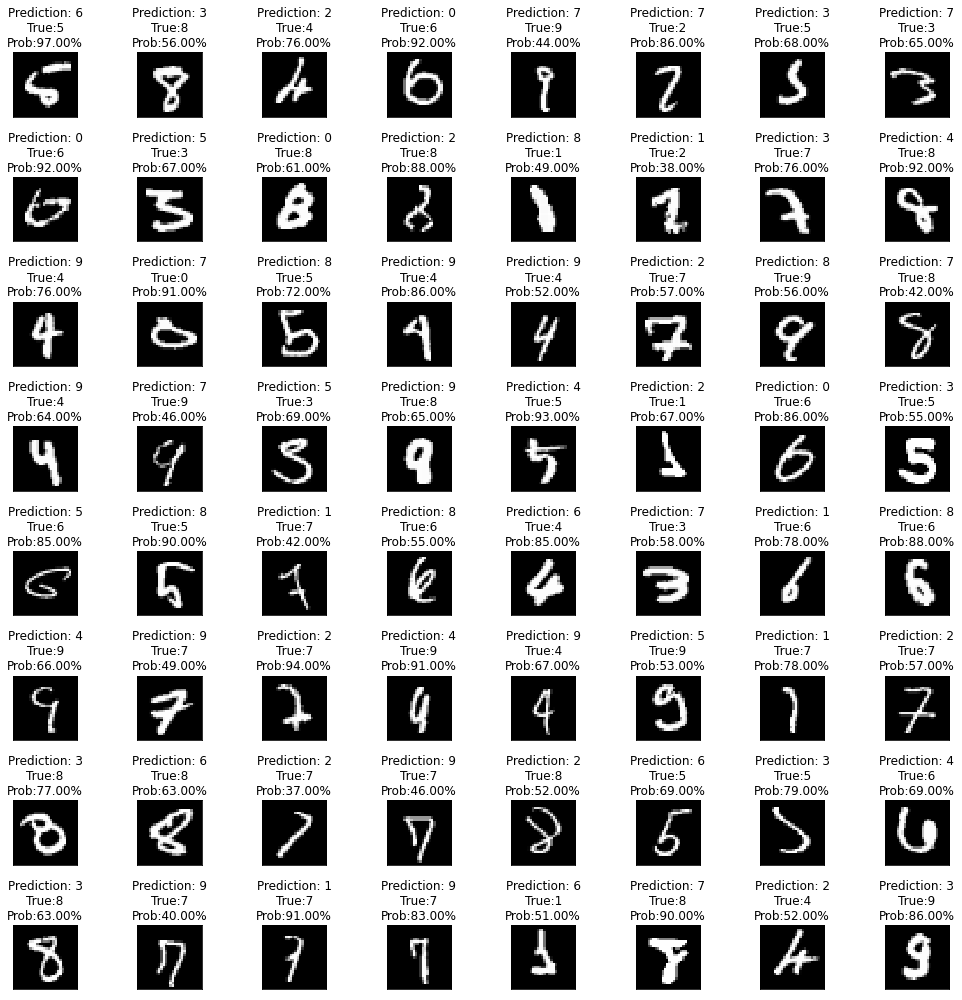

In [379]:
nrows=8
ncols=8
wrong_ones = x_test[~mask][:nrows*ncols]
outcomes = y_test[~mask][:nrows*ncols]
fails = pred_vals[~mask][:nrows*ncols]
probs = pred_all[~mask][:nrows*ncols]
print(len(wrong_ones), len(outcomes), len(fails))



fig, ax = plt.subplots(nrows,ncols,figsize=(14,14))

for i in range(ncols):
    for j in range(nrows):
        idx = i*nrows + j
        title = "Prediction: {0}\nTrue:{1}\nProb:{2:.2f}%".format(int(fails[idx]),
                                                                 outcomes[idx],
                                                                 np.round(probs[idx].max()*100,0))
        image = wrong_ones[i*nrows+j].reshape(28,28)
        ax[i,j].imshow(image, cmap="gray", interpolation="nearest")
        ax[i,j].set_title(title)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

fig.tight_layout()        
plt.show()

Instead of 16 I have done 64!

### ROC curves for each class

In [380]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

"This is a One Vs. All problem"

https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

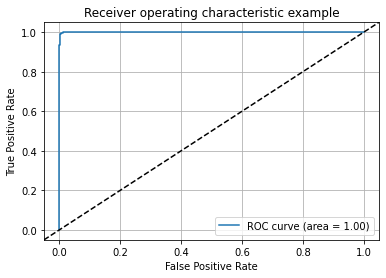

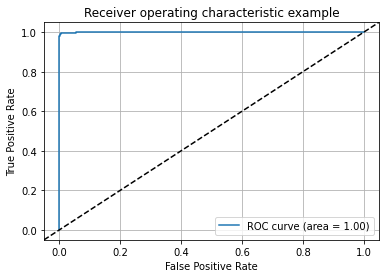

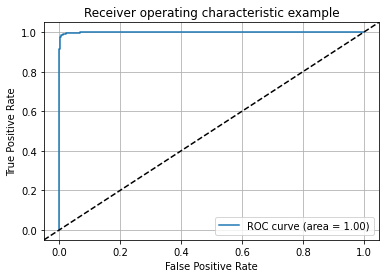

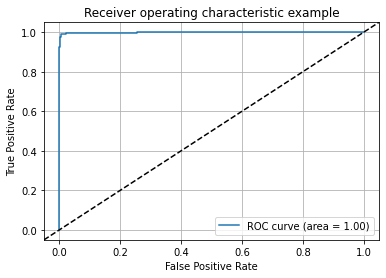

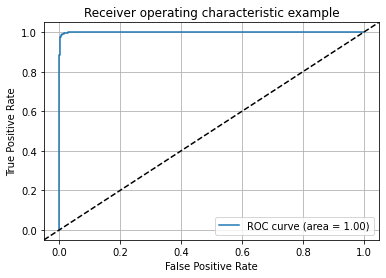

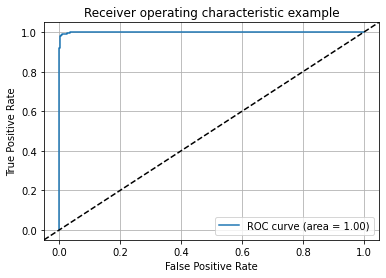

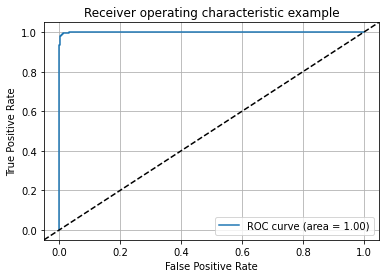

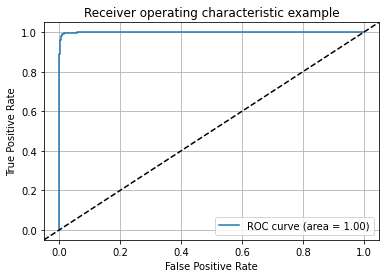

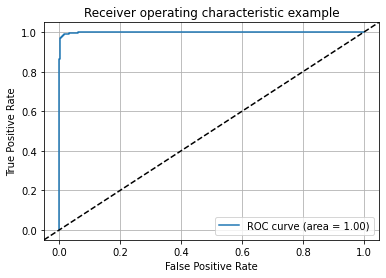

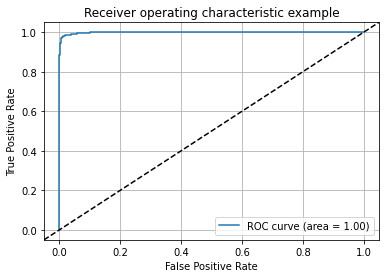

In [381]:
fpr_10 = dict()
tpr_10 = dict()
roc_auc = dict()
for i in range(len(pred_all[0])):
    fpr_10[i], tpr_10[i], _ = roc_curve(y_test_oh[:, i], pred_all[:, i])
    roc_auc[i] = auc(fpr_10[i], tpr_10[i])

for i in range(len(pred_all[0])):
    plt.figure()
    plt.plot(fpr_10[i], tpr_10[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([-0.05, 1.05], [-0.05, 1.05], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

These are really steep ROC curves, keras sequential 2 is very good at doing this!

### 4. Come up with your own model

* come up with your own small model (< 100'000 neurons)
* train it for 50 epochs
* visualize the loss for train/test on the same plot
  * what are your thoughs on the phenomenon?
* plot the ROC curves and the AUC scores



${\bf NOTE}$

I looked on many many sites for a nice neural network modell. There many solutions, with different logic behind them. 

https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839

But this makes a fully connected neural network

https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

${\small \text{I feel dirty}}$

In [339]:
from keras.utils import np_utils

def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError
        
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error
    
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error
    
class Network:
    def __init__(self):
        self.layers = []
        self.errors = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        
        errors = []

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            errors.append(err)
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        self.errors = errors

In [340]:
# Network
net = Network()
net.add(FCLayer(28*28, 200))                # input_shape=(1, 28*28)    ;   output_shape=(1, 200)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(200, 50))                   # input_shape=(1, 200)      ;   output_shape=(1, 50)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add(ActivationLayer(tanh, tanh_prime))

net.use(mse, mse_prime)

In [341]:
#this solution needs a different data shape
(x_train2, y_train2), (x_test2, y_test2) = keras.datasets.mnist.load_data()

x_train2 = x_train2.reshape(x_train2.shape[0], 1, 28*28)
x_train2 = x_train2.astype('float32')
x_train2 /= 255
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train2 = np_utils.to_categorical(y_train2)

# same for test data : 10000 samples
x_test2 = x_test2.reshape(x_test2.shape[0], 1, 28*28)
x_test2 = x_test2.astype('float32')
x_test2 /= 255
y_test2 = np_utils.to_categorical(y_test2)

# Network
net = Network()
net.add(FCLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 50))                   # input_shape=(1, 100)      ;   output_shape=(1, 50)
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(50, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add(ActivationLayer(tanh, tanh_prime))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(mse, mse_prime)
net.fit(x_train2[0:1000], y_train2[0:1000], epochs=50, learning_rate=0.08)


epoch 1/50   error=0.228942
epoch 2/50   error=0.095460
epoch 3/50   error=0.077809
epoch 4/50   error=0.067479
epoch 5/50   error=0.059821
epoch 6/50   error=0.053898
epoch 7/50   error=0.048813
epoch 8/50   error=0.044302
epoch 9/50   error=0.040285
epoch 10/50   error=0.036746
epoch 11/50   error=0.033629
epoch 12/50   error=0.031035
epoch 13/50   error=0.028792
epoch 14/50   error=0.026907
epoch 15/50   error=0.025295
epoch 16/50   error=0.023804
epoch 17/50   error=0.022431
epoch 18/50   error=0.021133
epoch 19/50   error=0.019919
epoch 20/50   error=0.018766
epoch 21/50   error=0.017684
epoch 22/50   error=0.016689
epoch 23/50   error=0.015769
epoch 24/50   error=0.014954
epoch 25/50   error=0.014242
epoch 26/50   error=0.013607
epoch 27/50   error=0.013022
epoch 28/50   error=0.012473
epoch 29/50   error=0.011941
epoch 30/50   error=0.011411
epoch 31/50   error=0.010898
epoch 32/50   error=0.010419
epoch 33/50   error=0.009975
epoch 34/50   error=0.009563
epoch 35/50   error=0.0

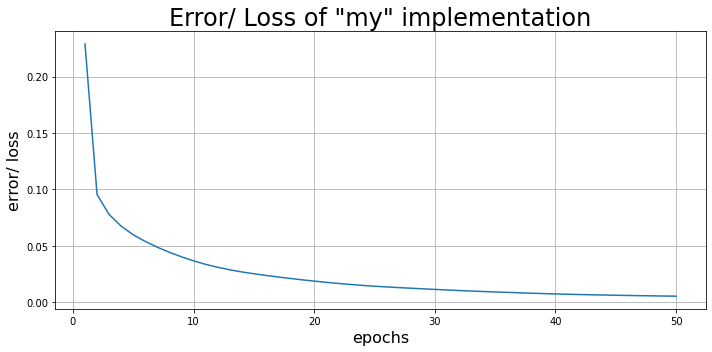

In [350]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Error/ Loss of "my" implementation', fontsize=24)
ax.plot(np.arange(len(net.errors))+1, net.errors)

ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("error/ loss", fontsize=16)

fig.tight_layout()
ax.grid()
plt.show()

### 5. Experiment with the CIFAR10 dataset

* preprocess the data, modify the models accordingly
  * train your small model as well as the model in the 3rd task on the CIFAR10 dataset
* compare the results
* are these models powerful enough to fit this data?

${\bf \text{Location of the cifar10 dataset}}$

https://www.cs.toronto.edu/~kriz/cifar.html


In [430]:
cX_train = np.load("./data/cifar10/data_batch_1")

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [431]:
import pickle
def unpickle(file):
    
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [440]:
#META
meta = unpickle("./data/cifar10/batches.meta")

#DATA
b1 = unpickle("./data/cifar10/data_batch_1")
b2 = unpickle("./data/cifar10/data_batch_2")
b3 = unpickle("./data/cifar10/data_batch_3")
b4 = unpickle("./data/cifar10/data_batch_4")
b5 = unpickle("./data/cifar10/data_batch_5")

BATCHES_TOGETHER = np.concatenate((b1[b'data'],
                                b2[b'data'],
                                b3[b'data'],
                                b4[b'data'],
                                b5[b'data'],),
                                axis=0
                               ) / 255
LABELS_TOGETHER = np.concatenate((b1[b'labels'],
                                b2[b'labels'],
                                b3[b'labels'],
                                b4[b'labels'],
                                b5[b'labels'],),
                                axis=0
                               ) 

LABELS_ENCODED = np_utils.to_categorical(LABELS_TOGETHER)

#TEST STUFF
t1 = unpickle("./data/cifar10/test_batch")
TEST_BATCH = t1[b'data'] / 255
TEST_LABELS = t1[b'labels']
TEST_LABELS_ENCODED = np_utils.to_categorical(TEST_LABELS)

print(meta)
print(LABELS_ENCODED[:5])
print(TEST_LABELS_ENCODED[:5])

{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [441]:
f_model = keras.Sequential()
f_model.add(keras.layers.Dense(1000, activation='relu', input_dim=3072))
f_model.add(keras.layers.Dense(750, activation='relu'))
f_model.add(keras.layers.Dense(300, activation='relu'))
f_model.add(keras.layers.Dense(10, activation='softmax'))

print(f_model.summary())

f_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1e-2), metrics=['accuracy', 'AUC'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_37 (Dense)            (None, 750)               750750    
                                                                 
 dense_38 (Dense)            (None, 300)               225300    
                                                                 
 dense_39 (Dense)            (None, 10)                3010      
                                                                 
Total params: 4,052,060
Trainable params: 4,052,060
Non-trainable params: 0
_________________________________________________________________
None


In [444]:
history = f_model.fit(x=BATCHES_TOGETHER, y=LABELS_ENCODED, batch_size=2048, epochs=25, validation_data=(TEST_BATCH, TEST_LABELS_ENCODED))

Epoch 1/25
25/25 [==============================] - 2s 80ms/step - loss: 1.9534 - accuracy: 0.3256 - auc: 0.7679 - val_loss: 1.9389 - val_accuracy: 0.3281 - val_auc: 0.7683
Epoch 2/25
25/25 [==============================] - 2s 79ms/step - loss: 1.9242 - accuracy: 0.3359 - auc: 0.7752 - val_loss: 1.9126 - val_accuracy: 0.3332 - val_auc: 0.7758
Epoch 3/25
25/25 [==============================] - 2s 79ms/step - loss: 1.8998 - accuracy: 0.3424 - auc: 0.7811 - val_loss: 1.8924 - val_accuracy: 0.3422 - val_auc: 0.7822
Epoch 4/25
25/25 [==============================] - 2s 79ms/step - loss: 1.8805 - accuracy: 0.3478 - auc: 0.7858 - val_loss: 1.8715 - val_accuracy: 0.3455 - val_auc: 0.7865
Epoch 5/25
25/25 [==============================] - 2s 79ms/step - loss: 1.8622 - accuracy: 0.3547 - auc: 0.7905 - val_loss: 1.8583 - val_accuracy: 0.3506 - val_auc: 0.7890
Epoch 6/25
25/25 [==============================] - 2s 79ms/step - loss: 1.8486 - accuracy: 0.3597 - auc: 0.7936 - val_loss: 1.8500 - v

In [ ]:
BATCHES_TOGETHER = BATCHES_TOGETHER.reshape(BATCHES_TOGETHER.shape[0], 1 , BATCHES_TOGETHER.shape[1])
print(BATCHES_TOGETHER.shape)

In [446]:
# Network
f_net = Network()
f_net.add(FCLayer(3072, 500))                # input_shape=(1, 28*28)    ;   output_shape=(1, 200)
f_net.add(ActivationLayer(tanh, tanh_prime))
f_net.add(FCLayer(500, 100))                   # input_shape=(1, 200)      ;   output_shape=(1, 50)
f_net.add(ActivationLayer(tanh, tanh_prime))
f_net.add(FCLayer(100, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
f_net.add(ActivationLayer(tanh, tanh_prime))

f_net.use(mse, mse_prime)

In [447]:
f_net.fit(BATCHES_TOGETHER[0:1000], BATCHES_TOGETHER[0:1000], epochs=25, learning_rate=1e-2)

ValueError: operands could not be broadcast together with shapes (3072,) (1,10) 

I don't know what's going...

${\bf CONCLUSION}$

Because the RGB values are flattened together, it would take way to much time to classify objects. Something that would make it faster is to change colorspace from RGB to HSV or Lab, and then use the L / V (brigthness/value) to classify stuff. It would make it faster, as it need 1/3 the data, OpenCV can convert fast, and as we need object detection, it would make the neural networks' job easier. Its a bit of a shame that I could not make the other network work.

Also, keras sequential is proven to be good in the 3rd exercise, but it doesn't reach the same accuracy in 5th exercis as it did before...

Hints:

On total you can get 10 points for fully completing all tasks.

Decorate your notebook with, questions, explanation etc, make it self contained and understandable!

Comments you code when necessary

Write functions for repetitive tasks!

Use the pandas package for data loading and handling

Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation

Use the scikit learn package for almost everything

Use for loops only if it is really necessary!

Code sharing is not allowed between student! Sharing code will result in zero points.

If you use code found on web, it is OK, but, make its source clear!
